In [1]:
from imageGAN import *
import matplotlib.pyplot as plt
import numpy
import os
from dataset_helper import *

In [2]:
gan = ImageGAN((256,256,3),[32,32,32,64,128],[128,64])

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1000)]            0         
_________________________________________________________________
dense (Dense)                (None, 2048)              2050048   
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 16, 16, 32)        9216      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 32, 32, 32)        9216      
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 64, 64, 32)        9216      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 128, 128, 64)      18

2021-07-31 12:26:18.241717: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
noise = np.random.normal(size=(1,1000))
noise.shape

(1, 1000)

In [4]:
image = gan.generator.predict(noise)

2021-07-31 12:26:18.529770: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


(1, 256, 256, 3)


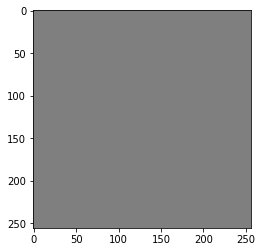

In [5]:
plt.imshow(image[0])

print(image.shape)

In [6]:
print(gan.desrciminator.predict(image))

[[0.494273]]


In [7]:
names = ["../data/skyline_images/" + x for x in os.listdir("../data/skyline_images/") if ".jpg" in x]

In [8]:
tensor = getTrainingTensor(names,(256,256,3))[:100]

In [9]:
gan.compile(optimizer=keras.optimizers.Adam(),run_eagerly=True)



In [10]:
if __name__ == "__main__":
    gan.fit(tensor, epochs=1,batch_size=32,)

4/4 [==============================] - 147s 33s/step - loss: 2.1056


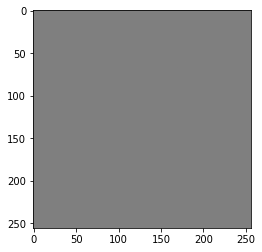

In [11]:
image = gan.generator.predict(noise)

plt.imshow(image[0])

In [13]:
gan.save_weights("tmp")